
# Project: Investigate TMDb Movies Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>    **In this analysis we are going to investigate TMDb movies database. The database contains all movies data from 1960 to 2015 and has specific details about every movie such as title, budget, revenue, year of release, runtime and generes.**

>    **We will investigate the database to find out the top 5 years of highest average spending on film production and the movies most spent on in these years.
Also, we will explore the movies with the heighest revenues of all time and the relation between those movies budgets and revenue.**

In [58]:
#importing all needed packages for the analysis 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> **In this section we will do the following**
   <lo>
        <li>load the TMdb database file</li>
        <li>explore database header, first and last few rows</li>
        <li>finding columns information such as the column data type and the mean of its values</li>
        <li>counting duplicates and empty rows</li>
   </lo>
</a>
### General Properties

In [59]:
#reading the TMDb database file tmdb-movies.csv
df = pd.read_csv('tmdb-movies.csv')
#checking the data header and first few rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [60]:
#checking the data header and last few rows
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [61]:
#checking data types/counts/empty cells
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [62]:
#checking the data describe for getting an overview on the mean/min/max values of each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [63]:
#counting duplicates rows
sum(df.duplicated())

1

In [64]:
#exploring duplicated rows 
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Data Cleaning 
> **In our data cleaning we will drop and trim parts of the data we won't be using in our analysis**
    <lo>
    <li>dropping all columns we won't use in our analysis </li>
    <li>trimming duplicated rows as it won't help in giving us better results</li>
    <li>making sure that movies with no or zero budget or revenue is not under one category by using histograms</li>
    <li>dropping rows that has no data about movie budget or revenue so it doens't mess our analysis</li>
    <li>checking that the data is clean and no more errors before starting the analysis</li>
    </lo>


In [65]:
#dropping all the columns we won't be using in this analysis
df.drop(['id','imdb_id','cast', 'director','homepage','tagline',
         'overview','keywords','production_companies','genres',
         'release_date','vote_count','budget','revenue'], axis=1, inplace= True)

In [66]:
#dropping all duplicated rows
df.drop_duplicates(inplace=True)

In [67]:
#checking agian data types/counts/empty cells
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 679.1+ KB


In [68]:
#checking the data header and first few rows after cleaning
df.head()

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,7.3,2015,1.747999e+08,1.385749e+09


In [69]:
#checking the data describe for getting an overview on the mean/min/max values of each column
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,102.071790,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,31.382701,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,111.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [70]:
#taking a look on budget zero values movies data as it exceeds 50% of the data
df.query('budget_adj ==0.0')

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,Mr. Holmes,103,6.4,2015,0.0,2.700677e+07
36,3.358321,Solace,101,6.2,2015,0.0,2.056620e+07
72,2.272044,Beyond the Reach,95,5.5,2015,0.0,4.222338e+04
74,2.165433,Mythica: The Darkspore,108,5.1,2015,0.0,0.000000e+00
75,2.141506,Me and Earl and the Dying Girl,105,7.7,2015,0.0,0.000000e+00
88,1.959765,Equals,101,5.6,2015,0.0,1.839999e+06
92,1.876037,Mythica: The Necromancer,0,5.4,2015,0.0,0.000000e+00
95,1.841779,Alvin and the Chipmunks: The Road Chip,92,5.7,2015,0.0,2.150550e+08
100,1.724712,Frozen Fever,8,7.0,2015,0.0,0.000000e+00
101,1.661789,High-Rise,119,5.4,2015,0.0,0.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d257b1208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7d274ac5c0>]], dtype=object)

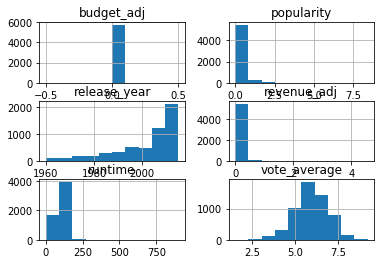

In [71]:
#taking a look on budget zero values movies histograms as it exceeds 50% of the movies data
df.query('budget_adj ==0.0').hist()

> histograms shows that Zero budget values are not just in one category and its spreaded over the years

In [72]:
#checking if movies with zero values budget in a specific group of years
df.query('revenue_adj ==0.0').groupby('release_year')['release_year'].count()

release_year
1960     25
1961     21
1962     23
1963     27
1964     34
1965     30
1966     41
1967     26
1968     27
1969     26
1970     28
1971     41
1972     30
1973     38
1974     30
1975     29
1976     31
1977     33
1978     41
1979     30
1980     39
1981     42
1982     41
1983     28
1984     52
1985     42
1986     45
1987     53
1988     64
1989     60
1990     55
1991     63
1992     51
1993     70
1994     97
1995     75
1996    100
1997     85
1998    104
1999    106
2000    116
2001    114
2002    127
2003    142
2004    143
2005    180
2006    202
2007    243
2008    290
2009    333
2010    272
2011    299
2012    372
2013    415
2014    472
2015    413
Name: release_year, dtype: int64

In [73]:
#drop zero values from a specific column with this funiction
def drop_zero_vals(column):
    df[column]= df[column].replace(0.0, np.NaN)
    df.dropna(inplace= True)

In [74]:
#drop movies with zero budget/revenue as it won't help with our analysis
drop_zero_vals('budget_adj')
drop_zero_vals('revenue_adj')

In [75]:
#making sure our data is totally clean before starting our analysis
df.head()

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **In this section**: We will use the cleaned data from the previous section and build our analysis using data visualization to build plots to compare between movies budgets through the years. Also, we will find top movies with highest revenues of all time and compare the relation between its budget and revenue statiscs.

### What are the highest years in average spending on film production? and which movies most spent on in the top 5 years?



In [76]:
#finding the average budget of each movie in each year 
#by getting the mean of grouping release_year column and saving the results in budget_data
budget_data= df.groupby(['release_year']).mean()['budget_adj']

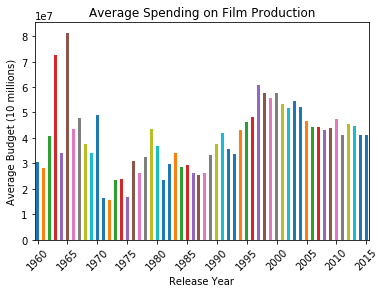

In [77]:
#buidling a bar plot to see the average movies budget throught the years
budget_data.plot(kind='bar')
#setting the ticks and distance between them on x-axis as well as rotation
plt.xticks(range(0,56,5),range(1960,2020,5) ,rotation=45)
#setting plot name
plt.title('Average Spending on Film Production')
#naming y and x lables
plt.ylabel('Average Budget (10 millions)')
plt.xlabel('Release Year')
#showing the plot
plt.show()

> **Average spending on Film Production**
<lo>
    <li>Movies average budgets changed over the years making a maximum value of 81 million dollars in 1965 and a lowest value of 15 million dollars in 1972.</li>
    <li>The average movies budgets of all time is 40 million dollars</li>
    <li>Movies budgets is clearly higher in the period of 1997-2015 compared to the period time of 1960-1996.</li>
</lo>
   

Text(0.5,0,'Release Year')

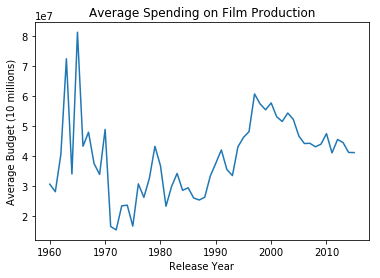

In [78]:
#building the data using a line curve for better overview about the up and down time periods in movies budgets
budget_data.plot()
#setting plot name
plt.title('Average Spending on Film Production')
#naming y and x lables
plt.ylabel('Average Budget (10 millions)')
plt.xlabel('Release Year')

> **Average spending on Film Production: The line Curve shows:**
<lo>
    <li>Significant gradually increase in movies budgets from 1970 to 1997.</li>
    <li>Gradually slightly decrease from 1997 to 2015.</li>
</lo>

In [79]:
#getting movies average budget of all years
budget_data.mean()

39919232.254952349

In [80]:
#sorting budgets to see the top movies budgets
budget_data.sort_values(ascending=False).head()

release_year
1965    8.138583e+07
1963    7.252496e+07
1997    6.080297e+07
2000    5.780982e+07
1998    5.746289e+07
Name: budget_adj, dtype: float64

In [81]:
#this function is taking one parameter (years) and returning the name
#of movie with the highest budget in this year
def get_max_movie(year):
    max_budget = df[df['release_year'] == year].max()['budget_adj']
    max_row = df[df['budget_adj'] == max_budget]
    movie_name = max_row['original_title']
    return movie_name


#### Getting movies with the highest budget in 1963, 1965, 1997, 1998 and 2000 years by calling the function get_max_movie(year) for each year

In [82]:
get_max_movie(1963)

10443    Cleopatra
Name: original_title, dtype: object

In [83]:
get_max_movie(1965)

10716    The Greatest Story Ever Told
Name: original_title, dtype: object

In [84]:
get_max_movie(1997)

5231    Titanic
Name: original_title, dtype: object

In [85]:
get_max_movie(1998)

8970         Armageddon
8995    Lethal Weapon 4
Name: original_title, dtype: object

In [86]:
get_max_movie(2000)

8671    Dinosaur
Name: original_title, dtype: object

### What are the movies with the heighest revenues ? and the relation between those movies budgets and revenue?  

In [87]:
#sorting revenue to see the top movies revenues
df.sort_values('revenue_adj',ascending=False).head()

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,Avatar,162,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,Star Wars,121,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,Titanic,194,7.3,1997,2.716921e+08,2.506406e+09
10594,2.010733,The Exorcist,122,7.2,1973,3.928928e+07,2.167325e+09
9806,2.563191,Jaws,124,7.3,1975,2.836275e+07,1.907006e+09


In [88]:
#storing top 5 highest revenue movies rows in data
data= df.sort_values('revenue_adj',ascending=False).head()

#storing its budgets in movies_budget
movies_budget = data['budget_adj']
#storing its revenues in  movies_revenue
movies_revenue = data['revenue_adj']

#storing movies names in labels to use on X-axis
labels =data['original_title']

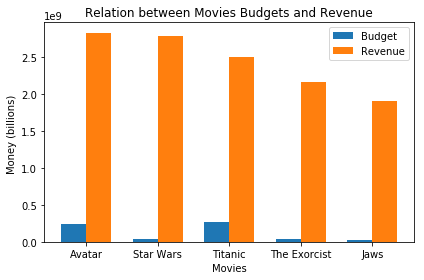

In [89]:
x = np.arange(5)  # label locations
width = 0.35  # width of the bars
fig, ax = plt.subplots()
#building bars for each budget and revenue for comparison
budget = ax.bar(x - width/2, movies_budget, width, label='Budget')
revenue = ax.bar(x + width/2, movies_revenue, width, label='Revenue')

#setting y and x lables
ax.set_ylabel('Money (billions) ')
ax.set_xlabel('Movies')

#setting histogram title
ax.set_title('Relation between Movies Budgets and Revenue')
#setting ticks distances
ax.set_xticks(x)
#setting x ticks
ax.set_xticklabels(labels)
#showing legneds names
ax.legend()
#using tight layout for lables to show clearly
fig.tight_layout()
plt.show()

> **Relation between Movies Budgets and Revenue: The bar curve shows:**
<lo>
    <li>Significant revenue rates compared to the movies budgets which exceeds 1000% in some movies</li>
    <li>Although, the Star Wars movie has less than half of the Titanic budget, the Star Wars got much higher revenue than Titanic</li>
    <li>Jaws and The Exorcist movies has nearly the same budget as Star Wars but got much less revenue in return</li>
</lo>

<a id='conclusions'></a>
## Conclusions

> **From Our Analysis** We found that the highest average years of spending on film production are 1963, 1965, 1997 ,1998 and 2000 and each movie budget starting from 57 million dollars in years 1998 and 2000 also, reached a maximum point in 1963 with 81 million dollars budget and an average budget of all times of 39.9 million dollars.

> **highest budget movies** 
    <lo>
        <li>in 1963 : Cleopatra</li>
        <li>in 1965 : The Greatest Story Ever Told</li>
        <li>in 1997 : Titanic</li>
        <li>in 1998 : Armageddon, Lethal Weapon 4</li>
        <li>in 2000 : Dinosaur</li>
    </lo>

> **highest revenues movies of all time**
    <lo>
        <li>Avatar : 2.82 billions dollars in 2009 with 7.1 average rate</li>
        <li>Star Wars : 2.78 billions dollars in 1977 with 7.9 verage rate</li>
        <li>Titanic : 2.5 billions dollars in 1997 with 7.3 average rate</li>
        <li>The Exorcist : 2.16 billions dollars in 1973 with 7.2 average rate</li>
        <li>Jaws : 1.9 billions dollars in 1975 with 7.3 average rate</li>
    </lo>

> **From the 'Relation between Movies Budgets and Revenue' histogram:**
<lo>
    <li>higher budget value doesn't mean always a higher revenue. </li>
    <li>Although, the Star Wars movie has less than half of the Titanic budget, the Star Wars got much higher revenue than Titanic</li>
    <li>Avatar's budget is 240 millions which is much higher than Star Wars that has budget of only 39 millions even though Star Wars got nearly the same revenue of 2.8 billion dollars as Avatar.</li>
</lo>

> **Limitation: 
This analysis has some limitation that might affect the results if not exsit due to:**
<lo>
    <li>Missing movies budget and revenue values of about 50% of TMdb database</li>
    <li>Only using movies released between 1960 to 2015 and in the TMdb database, so the last 4 years movies are not included</li>
    <li>Movies budgets and revenues is adjusted to 2010 dollars, accounting for inflation over time and not recently adjusted or updated.
 </li>
</lo>    

In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0